# Baseball Simulator at an Inning Level Using a Poisson Distribution
Pruthvi Rajaghatta

## Thought Process and Decisions

1. **Level of simulation**: I decided to structure the simulation at the inning level. This allows for a relatively simple implementation and still allows me to capture the essence of the game without getting lost in excessive detail. Simulating at a more granular level like at-bat or at-pitch would add complexity that at this point I personally couldn't fully understand. I wanted to stick to a level that I personally could explain and still comprehend.
2. **Statistical distribution**: I chose the Poisson distribution for simulating the number of runs scored in an inning. I based this on the fact that the Poisson distribution is widely used to model count data and rare events in a fixed interval. A famous example of this is the number of customers expected to arrive at a store in an hour. It also requires only one parameter, the average number of runs per inning.
3. **Simulation method**: The BaseballSimulatorPoisson class takes care of the entire simulation. The data used is a merged dataset based on games.csv and innings.csv. It allows for the simulation to be started at any particular inning (top or bottom) and returns the final score of the game. The data is split into home_inning_total_runs and away_inning_total runs. This decreases the sample size for calculating the average runs per inning, but it takes into account that a team may perform better at home versus away.
4. **Analysis method**: The analyze_simulation_results method performs the analysis of the simulated games, calculates win percentages, average runs, and average run differences, and plots the distribution of total runs for both team. This helps in understanding the head-to-head performance for both teams.
5. **Trade-offs**: The Poisson distribution may not be the perect fit for modeling baseball runs, as it assumes that the events (runs scored) are independent and occur at a constant rate. In reality, there are many more complexities to the sport, and the rate of runs scored can vary depending on factors like pitcher fatigue, game strategy, and many more.


## Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Simulator Class

In [12]:
class BaseballSimulatorPoisson:
    def __init__(self, data):
        self.data = data

    def calculate_avg_runs_by_inning(self, home_team, away_team):
        """
        Calculate the average runs scored per inning by the home and away team
        :param home_team: Home team's abbreviation
        :param away_team: Away team's abbreviation
        :return: A tuple containing the home team's average runs and away team's average runs
        """
        home_team_data = self.data[self.data['home_team'] == home_team]
        away_team_data = self.data[self.data['away_team'] == away_team]

        home_team_avg_runs = home_team_data['home_inning_total_runs'].mean()
        away_team_avg_runs = away_team_data['away_inning_total_runs'].mean()

        return home_team_avg_runs, away_team_avg_runs

    def simulate_inning(self, avg_runs):
        """
        Simulate an inning using a Poisson distribution with the given average runs
        :param avg_runs: Average runs per inning
        :return: Number of runs scored in the simulated inning
        """
        runs = np.random.poisson(avg_runs)
        return runs

    def simulate_game(self, home_team_avg_runs, away_team_avg_runs, start_inning, current_home_runs, current_away_runs, inning_half):
        """
        Simulate a baseball game from the given starting conditions using the given average runs per inning
        :param home_team_avg_runs: Home team's average runs per inning
        :param away_team_avg_runs: Away team's average runs per inning
        :param start_inning: Inning number to start the simulation from (1-9)
        :param current_home_runs: Home team's number of runs at the start of the simulation
        :param current_away_runs: Away team's number of runs at the start of the simulation
        :param inning_half: Inning half to start the simulation from ("Top" or "Bottom")
        :return: A tuple containing the home and away team's final number of runs
        """
        # Calculate the average runs per inning for both teams
        home_team_avg_runs, away_team_avg_runs = self.calculate_avg_runs_by_inning(home_team, away_team)

        # Set the initial number of runs for both teams
        home_runs = current_home_runs
        away_runs = current_away_runs

        # Loop through the innings, starting from the specified start_inning
        for inning in range(start_inning, 10):
            # Determine which half-innings to simulate in the current inning
            for half in [inning_half, 'Bottom'] if inning == start_inning else ['Top', 'Bottom']:
                # Simulate the top half-inning (away team at bat)
                if half == 'Top':
                    runs = self.simulate_inning(away_team_avg_runs)
                    away_runs += runs
                # Simulate the bottom half-inning (home team at bat)
                else:
                    runs = self.simulate_inning(home_team_avg_runs)
                    home_runs += runs

                    if inning == 9 and half == 'Bottom' and home_runs > away_runs:
                        break

                # Reset the inning_half to 'Top'
                if inning == start_inning:
                    inning_half = 'Top'

        return home_runs, away_runs

    def analyze_simulation_results(self, home_team, away_team, n_simulations, start_inning=1, current_home_runs=0, current_away_runs=0, inning_half='Top'):
        """
        Analyze the results of n_simulations baseball games between the home and away teams
        :param home_team: Home team
        :param away_team: Away team
        :param n_simulations: Number of games to simulate
        :param start_inning: Inning number to start the simulation from (1-9)
        :param current_home_runs: Home team's number of runs at the start of the simulation
        :param current_away_runs: Away team's number of runs at the start of the simulation
        :param inning_half: Inning half to start the simulation from ("Top" or "Bottom")
        :return: Prints the analysis results and plot the histogram
        """
        # Initialize variables for counting wins and total runs
        home_wins = 0
        away_wins = 0
        total_home_runs = 0
        total_away_runs = 0
        home_runs_list = []
        away_runs_list = []

        # Simulate n_simulations games
        for _ in range(n_simulations):
            simulated_home_runs, simulated_away_runs = self.simulate_game(home_team, away_team, start_inning, current_home_runs, current_away_runs, inning_half)
            total_home_runs += simulated_home_runs
            total_away_runs += simulated_away_runs
            home_runs_list.append(simulated_home_runs)
            away_runs_list.append(simulated_away_runs)

            # Count wins for each team
            if simulated_home_runs > simulated_away_runs:
                home_wins += 1
            else:
                away_wins += 1

        # Calculate simulation metrics
        home_win_percentage = (home_wins / n_simulations) * 100
        away_win_percentage = (away_wins / n_simulations) * 100
        avg_home_runs = total_home_runs / n_simulations
        avg_away_runs = total_away_runs / n_simulations
        avg_run_difference = abs(avg_home_runs - avg_away_runs)

        # Print simulation metrics: win percentage, average total runs, average run difference
        print(f"Results of {n_simulations} simulations between {home_team} and {away_team}:")
        print(f"Home team ({home_team}) win percentage: {home_win_percentage:.2f}%")
        print(f"Away team ({away_team}) win percentage: {away_win_percentage:.2f}%")
        print(f"Average home runs: {avg_home_runs:.2f}")
        print(f"Average away runs: {avg_away_runs:.2f}")
        print(f"Average run difference: {avg_run_difference:.2f}")

        # Plot the distribution of total runs for both teams
        plt.hist(home_runs_list, bins='auto', alpha=0.5, label=f'{home_team} Runs')
        plt.hist(away_runs_list, bins='auto', alpha=0.5, label=f'{away_team} Runs')
        plt.xlabel('Total Runs')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Total Runs in {n_simulations} Simulations')
        plt.legend(loc='upper right')
        plt.show()


## Import Data and Initialize Simulator

In [13]:
merged_df = pd.read_csv('merged.csv')
simulator = BaseballSimulatorPoisson(merged_df)

## Input

In [17]:
# Change the following input variables to your liking
home_team = 'HOU'           # team abbreviation in all caps
away_team = 'CHW'           # team abbreviation in all caps
start_inning = 1            # 1-9
current_home_runs = 0       # whatever your heart desires
current_away_runs = 0       # look up
inning_half = 'Top'         # 'Top' or 'Bottom'

## Simulate Single Game

In [18]:
simulated_home_runs, simulated_away_runs = simulator.simulate_game(home_team, away_team, start_inning, current_home_runs, current_away_runs, inning_half)
print(f"Simulated final score: {home_team} {simulated_home_runs} - {simulated_away_runs} {away_team} ")

Simulated final score: HOU 2 - 9 CHW 


## Analysis

Results of 1000 simulations between HOU and CHW:
Home team (HOU) win percentage: 50.90%
Away team (CHW) win percentage: 49.10%
Average home runs: 4.95
Average away runs: 4.34
Average run difference: 0.61


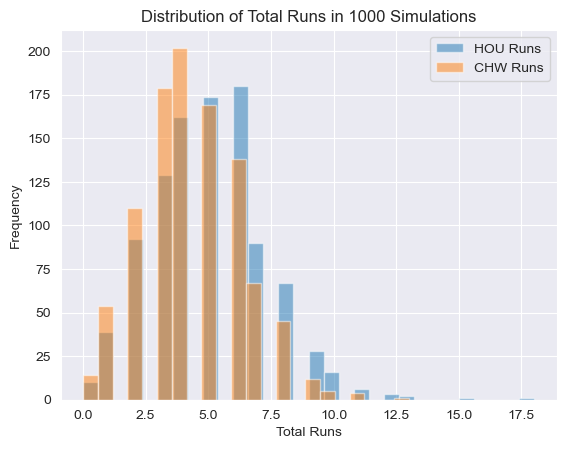

In [19]:
n_simulations = 1000
simulator.analyze_simulation_results(home_team, away_team, n_simulations)